# Distribuições de Probabilidade e os Retornos do Ibovespa

<b>OBJETIVO:</b>
- Encontrar a distribuição de probabilidade que <b>melhor se ajusta ao comportamento dos retornos diários do Ibovespa</b> em diferentes períodos de tempo.

<b>SUMÁRIO:</b>
- [1. Bibliotecas necessárias](#TOPICO_1)
- [2. Breve fundamentação teórica](#TOPICO_2)
    - [2.1. Variáveis aleatórias e Processos estocásticos](#TOPICO_21)
    - [2.2. Distribuições de Probabilidade](#TOPICO_22)
- [3. Aplicação prática: Distribuições de Probabilidade e os Retornos do Ibovespa](#TOPICO_3)
    - [3.1. Objetivo](#TOPICO_31)
    - [3.2. Considerações e Premissas](#TOPICO_32)
    - [3.3. Coletar dados do Ibovespa e calcular o Retorno diário](#TOPICO_33)
    - [3.4. Estatística Descritiva do Retorno diário do Ibovespa para cada período analisado](#TOPICO_34)
    - [3.5. Lista das Distribuições de Probabilidade utilizadas](#TOPICO_35)
    - [3.6. Distribuição de Probabilidade do Retorno Diário do Ibovespa - Período: últimos 6 meses](#TOPICO_36)
    - [3.7. Distribuição de Probabilidade do Retorno Diário do Ibovespa - Período: últimos 12 meses](#TOPICO_37)
    - [3.8. Distribuição de Probabilidade do Retorno Diário do Ibovespa - Período: últimos 2 anos](#TOPICO_38)
    - [3.9. Distribuição de Probabilidade do Retorno Diário do Ibovespa - Período: últimos 5 anos](#TOPICO_39)
    - [3.10. Distribuição de Probabilidade do Retorno Diário do Ibovespa - Período: últimos 10 anos](#TOPICO_310)
    - [3.11. Distribuição de Probabilidade do Retorno Diário do Ibovespa - Período: últimos 20 anos](#TOPICO_311)
- [4. Considerações finais](#TOPICO_4)
    - [4.1. Relação entre o tamanho da amostra e o ajuste das distribuições aos dados reais](#TOPICO_41)
    - [4.2. Resultados das distribuições encontradas para os períodos analisados](#TOPICO_42)
- [Referências](#referencias)

# 1. Bibliotecas necessárias <a id='TOPICO_1'></a>

In [1]:
#Biblioteca para análises e manipulações de dados
import pandas as pd
#Biblioteca para extração de dados do Mercado Financeiro do Yahoo Finance
import yfinance as yf
#Biblioteca para trabalhar com datas
from datetime import date
from datetime import timedelta
#Biblioteca para utilização de Distribuições de Probabilidade (derivada da Scipy)
from fitter import Fitter, get_common_distributions, get_distributions
#Biblioteca para criar gráficos
import matplotlib.pyplot as plt

# 2. Breve fundamentação teórica <a id='TOPICO_2'></a>

<b>2.1. VARIÁVEIS ALEATÓRIAS E PROCESSOS ESTOCÁSTICOS <a id='TOPICO_21'></a>

    Processo estocástico pode ser definido como uma variável que se comportam de maneira aleatória (parcial ou total). Essa sequência de aleatoriedade está associada ao tempo e/ou a ocorrência de determinados eventos.

    Um processo estocástico pode ser categorizado como um processo em tempo discreto ou em tempo contínuo. Tempo discreto é composto por variáveis discretas onde os valores de tais variáveis se alteram em um determinado instante de tempo. Já o tempo contínuo é composto de variáveis contínuas onde os valores de tais variáveis se alteram a qualquer instante de tempo.
    
    Alguns exemplos de processos estocásticos:
    1) Variação da temperatura de uma determinada cidade ao longo do tempo.
    2) Preço de uma ação listada na B3 (Bolsa de valores do Brasil) ao longo do tempo.
    3) Quantidade de pessoas que vão ao supermercado por dia.

*Maiores detalhes a respeito do tema disponível no <b>Capítulo 3</b> da [[Referência 1]](#referencia1) e no <b>Capítulo 4</b> da [[Referência 2]](#referencia2).

<b>2.2. DISTRIBUIÇÕES DE PROBABILIDADE <a id='TOPICO_22'></a>

    Sabendo da existência de processos estocásticos, as distribuições de probabilidade por sua vez descrevem o comportamento aleatório desses processos. Sendo assim, a distribuição de probabilidade que melhor se ajusta a uma variável aleatória "X" é, portanto, uma descrição das probabilidades relacionadas com os possíveis valores de "X".
    
    Como existem variáveis do tipo discreta e do tipo contínua, também existem distribuições de probabilidade para quando as variáveis são discretas e distribuições de probabilidade para quando as variáveis são contínuas. Seguem alguns exemplos:
    
    Distribuições de probabilidade para variáveis do tipo discreta:
        - Distribuição de Bernoulli
        - Distribuição Binomial
        - Distribuição de Poisson
        - Distribuição Geométrica
    
    Distribuições de probabilidade para variáveis do tipo contínua:
        - Distribuição Uniforme
        - Distribuição Exponencial
        - Distribuição Normal
        - Distribuição Lognormal
        - Distribuição Gama
        - Distribuição Beta
        - Distribuição Weibull
        - Distribuição Triangular

*Detalhes matemáticos a respeito das distribuições de probablidade nas seguintes referências: [[Referência 3]](#referencia3) e [[Referência 4]](#referencia4).

# 3. Aplicação prática: Distribuições de Probabilidade e os Retornos do Ibovespa <a id='TOPICO_3'></a>

<b>3.1. OBJETIVO <a id='TOPICO_31'></a>

- Encontrar a distribuição de probabilidade que <b>melhor se ajusta ao comportamento dos retornos diários do Ibovespa</b> em diferentes períodos de tempo.

<b>3.2. CONSIDERAÇÕES E PREMISSAS <a id='TOPICO_32'></a>

- O estudo é feito usando a linguagem de programação <b>Python</b>.
- É usado o <b>retorno diário</b> do Ibovespa, representado pela seguinte equação:

$$ Retorno_{diario} = (\frac{Cotacao_d}{Cotacao_{d-1}}-1)*100 $$

- As janelas temporais consideradas são os últimos: <b>6 meses, 12 meses, 2 anos, 5 anos, 10 anos e 20 anos</b>.
- O retorno diário do Ibovespa é uma <b>variável contínua</b>.
- As distribuições de probabilidade consideradas são: <b>Uniforme, Exponencial, Normal, Lognormal, Gama, Beta e Triangular</b>.
- É usado o método <b><i>SSE - Sum of squared errors</i></b> na determinação de qual distribuição de probabilidade melhor se ajusta ao comportamento do retorno diário do Ibovespa, em diferentes janelas temporais. Maiores detalhes em: [[Referência 5]](#referencia5).

<b>3.3. COLETAR DADOS DO IBOVESPA E CALCULAR O RETORNO DIÁRIO <a id='TOPICO_33'></a>

<b>Passo 1:</b> Definir as datas para os períodos desejados.

In [2]:
#Data últimos 6 meses (180 dias)
data_ult_6meses = date.today()-timedelta(180)
#Data últimos 12 meses (365 dias)
data_ult_12meses = date.today()-timedelta(365)
#Data últimos 2 anos (730 dias)
data_ult_2anos = date.today()-timedelta(730)
#Data últimos 5 anos (1825 dias)
data_ult_5anos = date.today()-timedelta(1825)
#Data últimos 10 anos (3650 dias)
data_ult_10anos = date.today()-timedelta(3650)
#Data últimos 20 anos (7300 dias)
data_ult_20anos = date.today()-timedelta(7300)

<b>Passo 2:</b> Função para coletar dados do Ibovespa e calcular o Retorno diário do período desejado.

In [3]:
def f_retorno_diario(ativo, data_periodo):
    #Coletar a Cotação do Ibovespa
    df_IBOV = yf.download(ativo, start=data_periodo, end=date.today(), progress=False)
    #Calcular o retorno diário do Ibovespa com base nos fechamentos diários
    df_IBOV["Retorno_Diario"] = df_IBOV["Close"].pct_change(periods=1)
    #Excluir valores NaN
    df_IBOV.dropna(subset=["Retorno_Diario"], inplace=True)
    #Armazenar retornos diários do período em um vetor
    vetor_retorno = df_IBOV["Retorno_Diario"].values   
    #Retornar vetor com os retornos diários
    return vetor_retorno

<b>Passo 3:</b> Calcular o vetor com os retornos diários do Ibovespa nos períodos desejados.

In [4]:
# "^BVSP" é a sigla do Índice Ibovespa no Yahoo Finance
Retorno_6meses = f_retorno_diario("^BVSP", data_ult_6meses)
Retorno_12meses = f_retorno_diario("^BVSP", data_ult_12meses)
Retorno_2anos = f_retorno_diario("^BVSP", data_ult_2anos)
Retorno_5anos = f_retorno_diario("^BVSP", data_ult_5anos)
Retorno_10anos = f_retorno_diario("^BVSP", data_ult_10anos)
Retorno_20anos = f_retorno_diario("^BVSP", data_ult_20anos)

<b>3.4. ESTATÍSTICA DESCRITIVA DO RETORNO DIÁRIO DO IBOVESPA PARA CADA PERÍODO ANALISADO <a id='TOPICO_34'></a>

In [5]:
#Criar DataFrame com as estatísticas descritivas
df_Retorno_6meses = pd.DataFrame(Retorno_6meses, columns=["Retorno_Últimos_6_meses"]).describe()
df_Retorno_12meses = pd.DataFrame(Retorno_12meses, columns=["Retorno_Últimos_12_meses"]).describe()
df_Retorno_2anos = pd.DataFrame(Retorno_2anos, columns=["Retorno_Últimos_2_anos"]).describe()
df_Retorno_5anos = pd.DataFrame(Retorno_5anos, columns=["Retorno_Últimos_5_anos"]).describe()
df_Retorno_10anos = pd.DataFrame(Retorno_10anos, columns=["Retorno_Últimos_10_anos"]).describe()
df_Retorno_20anos = pd.DataFrame(Retorno_20anos, columns=["Retorno_Últimos_20_anos"]).describe()
#Unir os DataFrames
df_Estatisticas = pd.concat([df_Retorno_6meses,df_Retorno_12meses,df_Retorno_2anos,
                             df_Retorno_5anos,df_Retorno_10anos,df_Retorno_20anos], axis=1)
#Transpor o DataFrame
df_Estatisticas = df_Estatisticas.transpose()
#Renomear as colunas com as estatísticas
df_Estatisticas.rename(columns={"count":"Tamanho_Amostra","mean":"Média","std":"Desvio_padrão","min":"Mínimo",
                                "25%":"1º_Quartil","50%":"Mediana","75%":"3º_Quartil","max":"Máximo"}, inplace=True)

In [6]:
#Exibir estatísticas
print("\033[1m"+"*OS VALORES DAS ESTATÍSTICAS DO RETORNO DIÁRIO DO IBOVESPA ESTÃO EM DECIMAL!\n")
df_Estatisticas

*OS VALORES DAS ESTATÍSTICAS DO RETORNO DIÁRIO DO IBOVESPA ESTÃO EM DECIMAL!



,Tamanho_Amostra,Média,Desvio_padrão,Mínimo,1º_Quartil,Mediana,3º_Quartil,Máximo
Retorno_Últimos_6_meses,123.0,-0.000385,0.011867,-0.029006,-0.006793,-0.000009,0.007543,0.024253
Retorno_Últimos_12_meses,249.0,-0.000475,0.012739,-0.037805,-0.008129,-0.000069,0.007985,0.036626
Retorno_Últimos_2_anos,495.0,0.000144,0.012951,-0.051201,-0.007668,0.000428,0.008776,0.036626
Retorno_Últimos_5_anos,1235.0,0.000503,0.016814,-0.147797,-0.007459,0.000608,0.009445,0.139082
Retorno_Últimos_10_anos,2471.0,0.000371,0.015759,-0.147797,-0.008129,0.000342,0.009039,0.139082
Retorno_Últimos_20_anos,4946.0,0.000634,0.017374,-0.147797,-0.008491,0.000854,0.010208,0.146560


<b>3.5. LISTA DAS DISTRIBUIÇÕES DE PROBABILIDADE UTILIZADAS <a id='TOPICO_35'></a>

<b>Passo 1:</b> Criar a lista com as distribuições. Usar o comando <b>"get_distributions()" da biblioteca "fitter"</b> para encontrar o nome correto das distribuições.

In [7]:
Lista_Distribuicoes = ["uniform","expon","norm","lognorm","gamma","beta","triang"]

<b>3.6. DISTRIBUIÇÃO DE PROBABILIDADE DO RETORNO DIÁRIO DO IBOVESPA - PERÍODO: ÚLTIMOS 6 MESES <a id='TOPICO_36'></a>

<b>Passo 1:</b> Calcular e Comparar os valores teóricos das distribuições de probabilidade com os valores reais. <b>OBS:</b> a função "Fitter" ordena as distribuições da que mais se ajusta para a que menos se ajusta, com base no "sumsquare_error".

,sumsquare_error,aic,bic,kl_div
norm,35523.331857,-527.785731,706.512927,inf
lognorm,35553.116324,-525.991989,711.428198,inf
gamma,35743.608001,-525.840600,712.085466,inf
triang,35819.304916,-547.037794,712.345677,inf
beta,35964.998596,-537.244554,717.657144,inf
uniform,45139.826231,-582.518634,735.980678,inf
expon,59644.605432,-520.640470,770.253248,inf


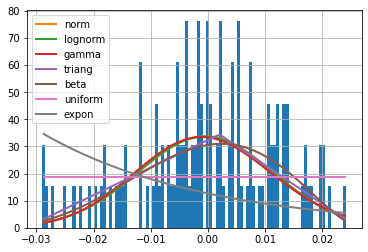

In [8]:
distribuicao_ult_6meses = Fitter(data=Retorno_6meses, distributions=Lista_Distribuicoes)
distribuicao_ult_6meses.fit()
distribuicao_ult_6meses.summary(Nbest=7)

<b>Passo 2:</b> Encontrar a distribuição de probabilidade que melhor se ajusta aos valores reais.

In [9]:
print("\033[1m"+"DataFrame com a distribuição que melhor se ajusta aos dados reais e seus respectivos parâmetros:")
pd.DataFrame(distribuicao_ult_6meses.get_best(method='sumsquare_error'))

DataFrame com a distribuição que melhor se ajusta aos dados reais e seus respectivos parâmetros:


,norm
loc,-0.000385
scale,0.011819


<b>3.7. DISTRIBUIÇÃO DE PROBABILIDADE DO RETORNO DIÁRIO DO IBOVESPA - PERÍODO: ÚLTIMOS 12 MESES <a id='TOPICO_37'></a>

<b>Passo 1:</b> Calcular e Comparar os valores teóricos das distribuições de probabilidade com os valores reais. <b>OBS:</b> a função "Fitter" ordena as distribuições da que mais se ajusta para a que menos se ajusta, com base no "sumsquare_error".

,sumsquare_error,aic,bic,kl_div
beta,7594.215723,-382.893482,873.074435,inf
norm,7747.294887,-399.616896,867.008789,inf
lognorm,7764.259074,-397.543215,873.070879,inf
gamma,7914.291826,-399.781027,877.836536,inf
triang,9161.856021,-462.915475,914.284798,inf
uniform,19534.920284,-515.577011,1097.298907,inf
expon,27120.805256,-454.205514,1178.995187,inf


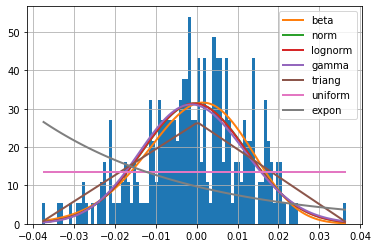

In [10]:
distribuicao_ult_12meses = Fitter(data=Retorno_12meses, distributions=Lista_Distribuicoes)
distribuicao_ult_12meses.fit()
distribuicao_ult_12meses.summary(Nbest=7)

<b>Passo 2:</b> Encontrar a distribuição de probabilidade que melhor se ajusta aos valores reais.

In [11]:
print("\033[1m"+"DataFrame com a distribuição que melhor se ajusta aos dados reais e seus respectivos parâmetros:")
pd.DataFrame(distribuicao_ult_12meses.get_best(method='sumsquare_error'))

DataFrame com a distribuição que melhor se ajusta aos dados reais e seus respectivos parâmetros:


,beta
a,205.939341
b,27.575770
loc,-0.532731
scale,0.603513


<b>3.8. DISTRIBUIÇÃO DE PROBABILIDADE DO RETORNO DIÁRIO DO IBOVESPA - PERÍODO: ÚLTIMOS 2 ANOS <a id='TOPICO_38'></a>

<b>Passo 1:</b> Calcular e Comparar os valores teóricos das distribuições de probabilidade com os valores reais. <b>OBS:</b> a função "Fitter" ordena as distribuições da que mais se ajusta para a que menos se ajusta, com base no "sumsquare_error".

,sumsquare_error,aic,bic,kl_div
beta,2037.167697,-296.994524,725.123429,inf
lognorm,2038.296100,-258.078964,719.192980,inf
norm,2042.717954,-264.789135,714.061106,inf
gamma,2194.044560,-252.905641,755.641046,inf
triang,4952.206246,-424.883755,1158.613870,inf
uniform,14490.581044,-482.477240,1683.873819,inf
expon,21315.348163,-418.785018,1874.908441,inf


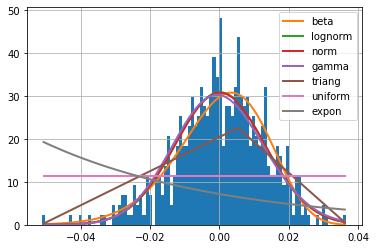

In [12]:
distribuicao_ult_2anos = Fitter(data=Retorno_2anos, distributions=Lista_Distribuicoes)
distribuicao_ult_2anos.fit()
distribuicao_ult_2anos.summary(Nbest=7)

<b>Passo 2:</b> Encontrar a distribuição de probabilidade que melhor se ajusta aos valores reais.

In [13]:
print("\033[1m"+"DataFrame com a distribuição que melhor se ajusta aos dados reais e seus respectivos parâmetros:")
pd.DataFrame(distribuicao_ult_2anos.get_best(method='sumsquare_error'))

DataFrame com a distribuição que melhor se ajusta aos dados reais e seus respectivos parâmetros:


,beta
a,6.957199e+06
b,1.607133e+01
loc,-2.305202e+04
scale,2.305207e+04


<b>3.9. DISTRIBUIÇÃO DE PROBABILIDADE DO RETORNO DIÁRIO DO IBOVESPA - PERÍODO: ÚLTIMOS 5 ANOS <a id='TOPICO_39'></a>

<b>Passo 1:</b> Calcular e Comparar os valores teóricos das distribuições de probabilidade com os valores reais. <b>OBS:</b> a função "Fitter" ordena as distribuições da que mais se ajusta para a que menos se ajusta, com base no "sumsquare_error".

,sumsquare_error,aic,bic,kl_div
beta,486.439445,1867.775844,-1122.191270,inf
norm,496.722701,1806.715101,-1110.593339,inf
lognorm,501.392988,1803.923329,-1091.917041,inf
triang,4752.499607,-185.075673,1685.642161,inf
uniform,6390.644241,-245.738993,2044.286332,inf
expon,7015.162991,-184.258633,2159.436330,inf
gamma,7483.055113,-61.907759,2246.295646,inf


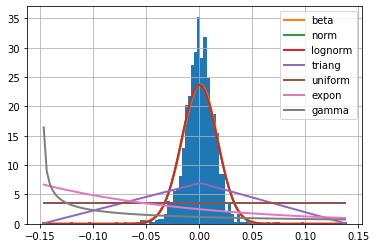

In [14]:
distribuicao_ult_5anos = Fitter(data=Retorno_5anos, distributions=Lista_Distribuicoes)
distribuicao_ult_5anos.fit()
distribuicao_ult_5anos.summary(Nbest=7)

<b>Passo 2:</b> Encontrar a distribuição de probabilidade que melhor se ajusta aos valores reais.

In [15]:
print("\033[1m"+"DataFrame com a distribuição que melhor se ajusta aos dados reais e seus respectivos parâmetros:")
pd.DataFrame(distribuicao_ult_5anos.get_best(method='sumsquare_error'))

DataFrame com a distribuição que melhor se ajusta aos dados reais e seus respectivos parâmetros:


,beta
a,117231.007373
b,450.637291
loc,-92.904572
scale,93.262209


<b>3.10. DISTRIBUIÇÃO DE PROBABILIDADE DO RETORNO DIÁRIO DO IBOVESPA - PERÍODO: ÚLTIMOS 10 ANOS <a id='TOPICO_310'></a>

<b>Passo 1:</b> Calcular e Comparar os valores teóricos das distribuições de probabilidade com os valores reais. <b>OBS:</b> a função "Fitter" ordena as distribuições da que mais se ajusta para a que menos se ajusta, com base no "sumsquare_error".

,sumsquare_error,aic,bic,kl_div
lognorm,250.638168,2152.203408,-5631.119868,inf
beta,251.711062,2166.405599,-5612.752581,inf
norm,256.241904,2129.143255,-5584.294485,inf
triang,4554.467657,-184.431702,1534.418366,inf
uniform,6197.208835,-245.738993,2287.650140,inf
expon,6822.954076,-184.264388,2525.344338,inf
gamma,7399.763495,-34.424391,2733.691988,inf


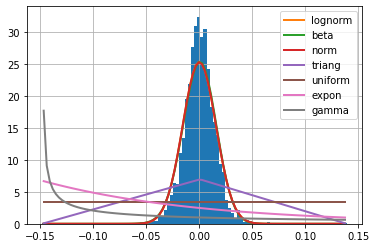

In [16]:
distribuicao_ult_10anos = Fitter(data=Retorno_10anos, distributions=Lista_Distribuicoes)
distribuicao_ult_10anos.fit()
distribuicao_ult_10anos.summary(Nbest=7)

<b>Passo 2:</b> Encontrar a distribuição de probabilidade que melhor se ajusta aos valores reais.

In [17]:
print("\033[1m"+"DataFrame com a distribuição que melhor se ajusta aos dados reais e seus respectivos parâmetros:")
pd.DataFrame(distribuicao_ult_10anos.get_best(method='sumsquare_error'))

DataFrame com a distribuição que melhor se ajusta aos dados reais e seus respectivos parâmetros:


,lognorm
loc,-9.331263
s,0.001683
scale,9.331642


<b>3.11. DISTRIBUIÇÃO DE PROBABILIDADE DO RETORNO DIÁRIO DO IBOVESPA - PERÍODO: ÚLTIMOS 20 ANOS <a id='TOPICO_311'></a>

<b>Passo 1:</b> Calcular e Comparar os valores teóricos das distribuições de probabilidade com os valores reais. <b>OBS:</b> a função "Fitter" ordena as distribuições da que mais se ajusta para a que menos se ajusta, com base no "sumsquare_error".

,sumsquare_error,aic,bic,kl_div
beta,254.237426,1775.235492,-14646.028460,inf
lognorm,254.590291,1778.629794,-14647.674831,inf
norm,255.294035,1769.995910,-14642.528168,inf
gamma,278.977166,1807.118754,-14195.242518,inf
triang,3882.843758,-178.957787,-1171.469167,inf
uniform,5417.242892,-240.592569,467.137373,inf
expon,5998.296212,-179.214843,971.077744,inf


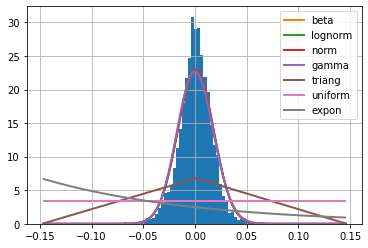

In [18]:
distribuicao_ult_20anos = Fitter(data=Retorno_20anos, distributions=Lista_Distribuicoes)
distribuicao_ult_20anos.fit()
distribuicao_ult_20anos.summary(Nbest=7)

<b>Passo 2:</b> Encontrar a distribuição de probabilidade que melhor se ajusta aos valores reais.

In [19]:
print("\033[1m"+"DataFrame com a distribuição que melhor se ajusta aos dados reais e seus respectivos parâmetros:")
pd.DataFrame(distribuicao_ult_20anos.get_best(method='sumsquare_error'))

DataFrame com a distribuição que melhor se ajusta aos dados reais e seus respectivos parâmetros:


,beta
a,44490.305545
b,10723.660729
loc,-8.313197
scale,10.317745


# 4. Considerações finais <a id='TOPICO_4'></a>

<b>4.1. RELAÇÃO ENTRE O TAMANHO DA AMOSTRA E O AJUSTE DAS DISTRIBUIÇÕES AOS DADOS REAIS <a id='TOPICO_41'></a>

In [20]:
#Criar o DataFrame com os tamanhos da amostra e erros de ajuste das distribuições para cada período
dados = {
    "Períodos": ["6_meses","12_meses","2_anos","5_anos","10_anos","20_anos"],
    "Tamanho_Amostra": [df_Estatisticas["Tamanho_Amostra"][0],df_Estatisticas["Tamanho_Amostra"][1],
                        df_Estatisticas["Tamanho_Amostra"][2],df_Estatisticas["Tamanho_Amostra"][3],
                        df_Estatisticas["Tamanho_Amostra"][4],df_Estatisticas["Tamanho_Amostra"][5]],
    "Erro_Ajuste": [distribuicao_ult_6meses.summary(plot=False)["sumsquare_error"][0],
                    distribuicao_ult_12meses.summary(plot=False)["sumsquare_error"][0],
                    distribuicao_ult_2anos.summary(plot=False)["sumsquare_error"][0],
                    distribuicao_ult_5anos.summary(plot=False)["sumsquare_error"][0],
                    distribuicao_ult_10anos.summary(plot=False)["sumsquare_error"][0],
                    distribuicao_ult_20anos.summary(plot=False)["sumsquare_error"][0]]
}
df_TamanhoAmostra_vs_Erro = pd.DataFrame(dados)

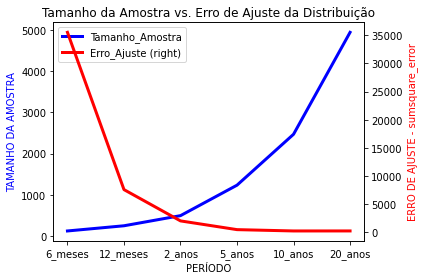

In [21]:
#Criar gráfico
ax = df_TamanhoAmostra_vs_Erro.plot(kind = 'line', x = 'Períodos', y = 'Tamanho_Amostra', color = 'Blue', linewidth = 3)   
ax2 = df_TamanhoAmostra_vs_Erro.plot(kind = 'line', x = 'Períodos', y = 'Erro_Ajuste', secondary_y = True, color = 'Red',  
                                     linewidth = 3, ax = ax) 
plt.title("Tamanho da Amostra vs. Erro de Ajuste da Distribuição") 
ax.set_xlabel('PERÍODO', color = 'black') 
ax.set_ylabel('TAMANHO DA AMOSTRA', color = "b") 
ax2.set_ylabel('ERRO DE AJUSTE - sumsquare_error', color = 'r') 
plt.tight_layout()
plt.show()

    Para essa comparação considerou-se a distribuição que melhor se ajustou para cada período analisado.
    
    É possível observar a existência de uma relação inversamente proporcional entre o tamanho da amostra e o erro de ajuste da distribuição aos valores reais.
    
    A distribuição de probabilidade que melhor se ajustou ao comportamento dos retornos diários do Ibovespa nos últimos 6   meses obteve um alto índice de erro entre os valores teóricos da distribuição e os valores reais. Por outro lado, nos   períodos de 5 anos ou mais, o erro de ajuste dos valores teóricos frente aos valores reais obteve um valor bem menor.
    
    O fato do erro de ajuste diminuir com o aumento do tamanho da amostra, evidencia o seguinte ponto: quanto menos amostras se tem, maior a incerteza em relação ao comportamento das variáveis ao longo do tempo e/ou ocorrência de eventos.

<b>4.2. RESULTADOS DAS DISTRIBUIÇÕES ENCONTRADAS PARA OS PERÍODOS ANALISADOS <a id='TOPICO_42'></a>

    De forma geral, podemos observar que das distribuições de probabilidade testadas, a Exponencial e a Uniforme são as que possuem os piores ajustes em relação aos valores reais nos diferentes períodos analisados. 
    
    Por outro lado, as distribuições Beta, Normal e Lognormal são as que possuem os melhores ajustes em relação aos valores reais nos diferentes períodos analisados. Dos 6 períodos analisados, a distribuição Beta obteve o melhor ajuste em 5.
    
    Por que encontrar a distribuição de probabilidade que melhor se ajusta ao comportamento de variáveis de comportamento   aleatório/estocástico? Respondendo com um viés no campo das finanças, essas distribuições de probabilidade podem servir como inputs para modelos (matemáticos, de simulação, entre outros) que possuem o objetivo de suportar um processo de    tomada de decisão mais inteligente.

# Referências <a id='referencias'></a>

<b>[Referência 1]</b> https://www.maxwell.vrac.puc-rio.br/colecao.php?strSecao=resultado&nrSeq=15321@1 <a id='referencia1'></a>

<b>[Referência 2]</b> https://www.maxwell.vrac.puc-rio.br/colecao.php?strSecao=resultado&nrSeq=10083@1 <a id='referencia2'></a>

<b>[Referência 3]</b> https://www.teses.usp.br/teses/disponiveis/96/96132/tde-07022020-101508/publico/GiseleSMontanari_Corrigida.pdf <a id='referencia3'></a>

<b>[Referência 4]</b> https://dagshub.com/ThomIves/Probability_and_Statistics_with_Python/src/master/Statistics_with_Python.ipynb <a id='referencia4'></a>

<b>[Referência 5]</b> https://hlab.stanford.edu/brian/error_sum_of_squares.html <a id='referencia5'></a>